In [1]:
# Import the needed libarairies
import warnings # to ignore pandas version warning
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib.ticker import MaxNLocator
from scipy.stats import ttest_ind, spearmanr # to implement statistical tests
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans # for actors analysis
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


########################### Read datasets from repository's data folder ############################
movie_mtd = pd.read_table('data/movie_metadata_CMU_IMDB.csv', sep=',')
actor_mtd = pd.read_table('data/actor_metadata_CMU.csv', sep=',')
personas_mtd = pd.read_table('data/personas_metadata_CMU.csv', sep=',')

# Set a global background theme for all our plots and ignore warnings
sns.set_theme(style="darkgrid")
warnings.filterwarnings("ignore")

The total number of films in the dataset is 81748.
The total number of american movies uniquely produced in the US in the dataset is 30302.
The total number of american movies partially produced in the US in the dataset is 4109.
The total number of movies strictly produced outside the US in the dataset is 39182.


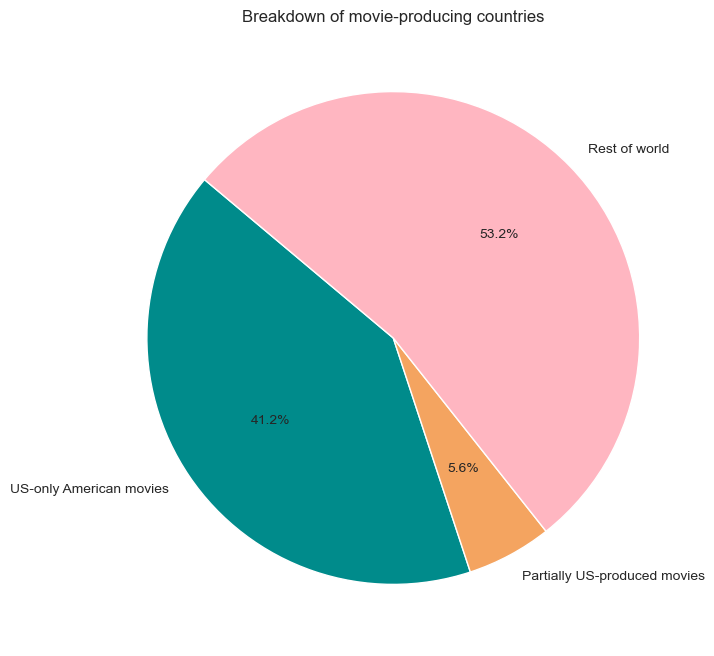

In [ ]:
# Modifications des graphes pour intégrer le drapeau us 
# Creating deep copies of original data frame to avoid messing it up
all_movies = movie_mtd.copy() # all movies in the dataset, no matter their production country
us_movies = movie_mtd.copy() 
us_partially_movies = movie_mtd.copy()
all_us_movies = movie_mtd.copy()
rest_world_non_US = movie_mtd.copy()

## Filtering the newly created dataframes for the analysis of nox office revenue, IMDb ratings and runtimes
# Movies strictly produced in the US
us_movies = us_movies[us_movies['countries'] == 'United States of America']
# Movies partially produced in the US
us_partially_movies = us_partially_movies[(us_partially_movies['countries'].str.contains('United States of America') == True) & (us_partially_movies['countries'] != 'United States of America')]
# Contains the movies strictly produced in the US and the ones partially produced in the US
all_us_movies = all_us_movies[(all_us_movies['countries'] == 'United States of America') | (all_us_movies['countries'].str.contains('United States of America') == True)]

# Non-US movies
rest_world_non_US = rest_world_non_US[(rest_world_non_US['countries'].str.contains('United States of America') == False) & (rest_world_non_US['countries'] != 'United States of America')]

total_number_movies_df = len(all_movies)
# movies UNIQUELY produced in the US
total_number_US_movies = us_movies['countries'].count()

# US movies only PARTIALLY produced in the us
total_number_partial_US_movies = us_partially_movies['countries'].count()
# Non-US produced movies (ROW)
strict_rest_world_movies = rest_world_non_US['countries'].count()

print(f"The total number of films in the dataset is {total_number_movies_df}.")
print(f"The total number of american movies uniquely produced in the US in the dataset is {total_number_US_movies}.")
print(f"The total number of american movies partially produced in the US in the dataset is {total_number_partial_US_movies}.")
print(f"The total number of movies strictly produced outside the US in the dataset is {strict_rest_world_movies}.")

list_numbers_movies_granular = [total_number_US_movies, total_number_partial_US_movies, strict_rest_world_movies] 

fig, ax = plt.subplots(figsize=(12, 8))
ax.pie(
    list_numbers_movies_granular,
    labels= ['US-only American movies', 'Partially US-produced movies' , 'Rest of world'],
    autopct='%1.1f%%',
    colors = ['darkcyan', 'sandybrown', 'lightpink'],
    textprops= {'size': 'smaller'},  # Adjust text size to fit the plot area
    startangle= 140,  # Start the chart at a different angle for better spacing
    wedgeprops= {'edgecolor': 'white'}  # white separation between slices to make the pie chart more readable
)
plt.title("Breakdown of movie-producing countries")
plt.show()

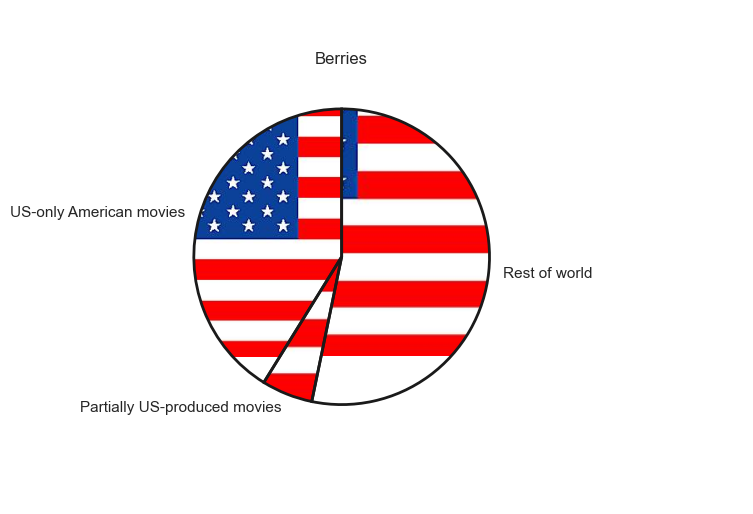

In [15]:
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

total = [5,7,4]
labels= ['US-only American movies', 'Partially US-produced movies' , 'Rest of world']
plt.title('Berries')
plt.gca().axis("equal")
wedges, texts = plt.pie(list_numbers_movies_granular, startangle=90, labels=labels,
                        wedgeprops = { 'linewidth': 2, "edgecolor" :"k","fill":False,  })

#add autopct='%1.1f%%'

def img_to_pie( fn, wedge, xy, zoom=1, ax = None):
    if ax==None: ax=plt.gca()
    im = plt.imread("data/flag_usa.png", format='png')
    path = wedge.get_path()
    patch = PathPatch(path, facecolor='none')
    ax.add_patch(patch)
    imagebox = OffsetImage(im, zoom=zoom, clip_path=patch, zorder=-10)
    ab = AnnotationBbox(imagebox, xy, xycoords='data', pad=0, frameon=False)
    ax.add_artist(ab)

positions = [(0,0.2),(0,-0.5),(0.5,0.5)]
zooms = [0.3,0.4,0.4]

for i in range(3):
    fn = "data/{}.png".format(labels[i].lower())
    img_to_pie(fn, wedges[i], xy=positions[i], zoom=zooms[i] )
    wedges[i].set_zorder(10)

plt.show()

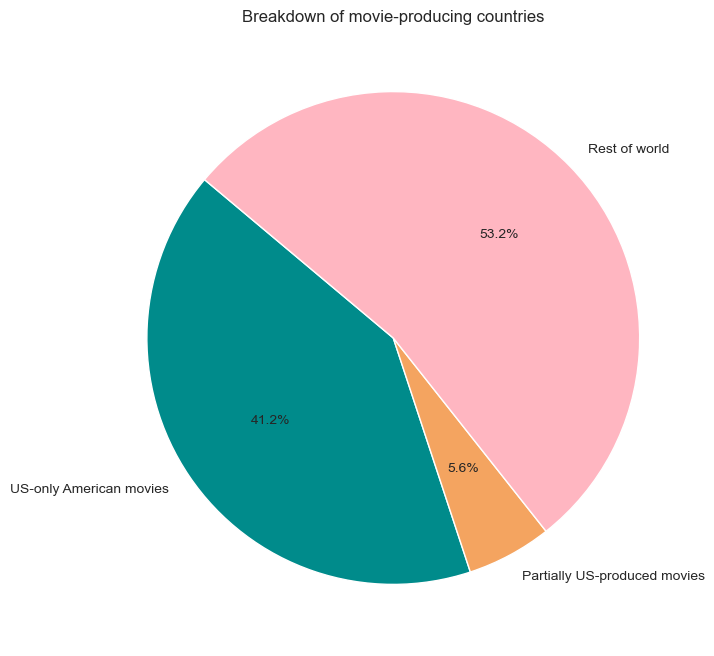

In [5]:
im = plt.imread("data/flag_usa.png", format='png')

fig, ax = plt.subplots(figsize=(12, 8))
ax.pie(
    list_numbers_movies_granular,
    labels= ['US-only American movies', 'Partially US-produced movies' , 'Rest of world'],
    autopct='%1.1f%%',
    colors = ['darkcyan', 'sandybrown', 'lightpink'],
    textprops= {'size': 'smaller'},  # Adjust text size to fit the plot area
    startangle= 140,  # Start the chart at a different angle for better spacing
    wedgeprops= {'edgecolor': 'white'}  # white separation between slices to make the pie chart more readable
)
plt.title("Breakdown of movie-producing countries")
plt.show()

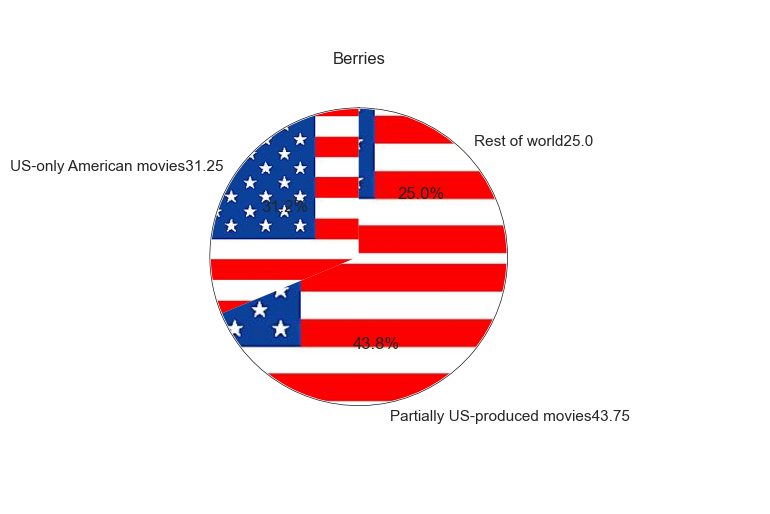

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Data
total = [5, 7, 4]
labels = ['US-only American movies', 'Partially US-produced movies', 'Rest of world']

for i, wedge in enumerate(wedges):
    # Calculate the angle for the text position
    angle = (wedge.theta1 + wedge.theta2) / 2
    # Convert the angle to radians for positioning
    x = 1.2 * np.cos(np.radians(angle))
    y = 1.2 * np.sin(np.radians(angle))
    
    # Calculate the percentage for each wedge
    percentage = total[i] / sum(total) * 100
    labels[i]+= @
    labels[i]+= str(percentage)

# Pie chart with percentages
plt.title('Berries')
plt.gca().axis("equal")
wedges, texts, autotexts = plt.pie(total, startangle=90, labels=labels, autopct='%1.1f%%',
                                   wedgeprops={'linewidth': 2, "edgecolor": "k", "fill": False})

def img_to_pie(fn, wedge, xy, zoom=1, ax=None):
    if ax is None:
        ax = plt.gca()
    im = plt.imread("data/flag_usa.png", format='png')
    path = wedge.get_path()
    patch = PathPatch(path, facecolor='none')
    ax.add_patch(patch)
    imagebox = OffsetImage(im, zoom=zoom, clip_path=patch, zorder=-10)
    ab = AnnotationBbox(imagebox, xy, xycoords='data', pad=0, frameon=False)
    ax.add_artist(ab)

# Positions for the images
positions = [(0, 0.2), (0, -0.5), (0.5, 0.5)]
zooms = [0.3, 0.4, 0.4]

# Adding images and adjusting the positions
for i in range(3):
    fn = f"data/{labels[i].lower().replace(' ', '_')}.png"  # Adjust the file naming to match the images
    img_to_pie(fn, wedges[i], xy=positions[i], zoom=zooms[i])

# Bring the percentage labels on top of the images
for autotext in autotexts:
    autotext.set_zorder(10)

# Show the plot
plt.show()
